In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import folium

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df_raw=pd.read_csv("../raw_data/seoul_pub/소상공인시장진흥공단_상가(상권)정보_서울_202209.csv")

df = df_raw.copy()
# theme
# 유흥주점

# df_main : 유흥주점  상가 모음
df_main = df[df['상권업종중분류명']=='유흥주점']

column_using=['상호명','상권업종소분류명','행정동명','법정동명',
 '지번주소','도로명', '도로명주소','경도', '위도']
df_main=df_main.loc[:,column_using]
df_main.sample(10,random_state=1)

상호명  상권업종소분류명    행정동명    법정동명                   지번주소  \
273583    아리수포차  소주방/포장마차    반포3동     잠원동    서울특별시 서초구 잠원동 69-14   
278869   더라이브센터  기타일반유흥주점    일원2동     일원동    서울특별시 강남구 일원동 615-1   
81857        큐브     호프/맥주     서원동     신림동   서울특별시 관악구 신림동 1637-8   
234913  역전할머니맥주     호프/맥주      능동      능동     서울특별시 광진구 능동 221-3   
178220    쿨치킨호프     호프/맥주  상계3.4동     상계동     서울특별시 노원구 상계동 91-6   
113400  신중부호프광장     호프/맥주     광희동     오장동     서울특별시 중구 오장동 148-7   
201528       신조  기타일반유흥주점    역삼1동     역삼동   서울특별시 강남구 역삼동 824-25   
90016     신강양꼬치   꼬치구이전문점    역삼1동     역삼동   서울특별시 강남구 역삼동 702-16   
228859      사계절     호프/맥주    시흥1동     시흥동    서울특별시 금천구 시흥동 838-3   
108479     서울의달     호프/맥주     회현동  남대문로5가  서울특별시 중구 남대문로5가 84-20   

                       도로명                                  도로명주소          경도  \
273583      서울특별시 서초구 신반포로              서울특별시 서초구 신반포로 205, (잠원동)  127.006447   
278869   서울특별시 강남구 개포로110길      서울특별시 강남구 개포로110길 43, (일원동, 개포한신)  127.080318   
81857        서울특별시 관악구 신림로               서울특별시 관악구 신림로 303, (신림동)  126.929730   
234913  서울특별시 광진구 천호대로110길            서울특별시 광진구 천호대로110길 28, (능동)  127.079499   
178220       서울특별시 노원구 덕릉로               서울특별시 노원구 덕릉로 765, (상계동)  127.077398   
113400     서울특별시 중구 을지로32길           서울특별시 중구 을지로32길 35-12, (오장동)  127.000845   
201528   서울특별시 강남구 강남대로84길  서울특별시 강남구 강남대로84길 33, (역삼동, 대우디오빌플러스)  127.031079   
90016    서울특별시 강남구 테헤란로47길             서울특별시 강남구 테헤란로47길 8, (역삼동)  127.045425   
228859       서울특별시 금천구 독산로                서울특별시 금천구 독산로 67, (시흥동)  126.905931   
108479     서울특별시 중구 세종대로2길            서울특별시 중구 세종대로2길 6, (남대문로5가)  126.973575   

               위도  
273583  37.507019  
278869  37.491182  
81857   37.481471  
234913  37.556033  
178220  37.665710  
113400  37.564909  
201528  37.497582  
90016   37.504214  
228859  37.453410  
108479  37.557629

In [3]:
location_data = df_main.iloc[:,-2:]
from sklearn.cluster import KMeans
# 1차 클러스터링
km = KMeans(n_clusters=10)
km.fit(location_data)
df_main['1st_clustering']=km.predict(location_data)

In [7]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[37.541,126.986],zoom_start=12,
                      tiles='Stamen Toner'
                      )
heatMap = HeatMap(zip(df_main['위도'],df_main['경도']),
                   min_opacity=0.8,
                   max_val=5,
                   radius=10, blur=15,
                   max_zoom=5,color='red')
m.add_child(heatMap)
m

In [8]:
color_set = ['darkblue', 'blue', 'green', 'purple', 'orange', 'black','darkpurple',
             'darkgreen', 'red', 'darkred']

# Draw a basemap
m = folium.Map(location=[37.541,126.986],zoom_start=12,
                      tiles='Stamen Toner'
                      )

for la,lo,cluster in df_main.loc[:,['경도','위도','1st_clustering']].values:
    folium.Circle(location = [lo,la],
                  radius=60,
                  color=color_set[int(cluster)],
                  fill=True,
                  opacity=0.3).add_to(m)
m

In [55]:
df_main.groupby('행정동명').count().sort_values('상호명',ascending=False).head(30).index

top30=['서교동', '역삼1동', '가양1동', '화양동', '종로1.2.3.4가동', '수유3동', '압구정동', '화곡1동',
       '영등포동', '신사동', '신촌동', '신림동', '구로2동', '연남동', '이태원1동', '길동', '천호2동',
       '시흥1동', '구로4동', '여의동', '논현2동', '을지로동', '가락본동', '잠실본동', '상계2동', '청담동',
       '서초3동', '응암3동', '방이2동', '화곡6동']

In [56]:
df_temp = df_main[df_main['행정동명'].isin(top100)]

In [57]:
tmp=df_temp.groupby('행정동명')['경도','위도'].std()
tmp['sum'] = tmp.sum(axis=1)

In [58]:
tmp=tmp.sort_values('sum')

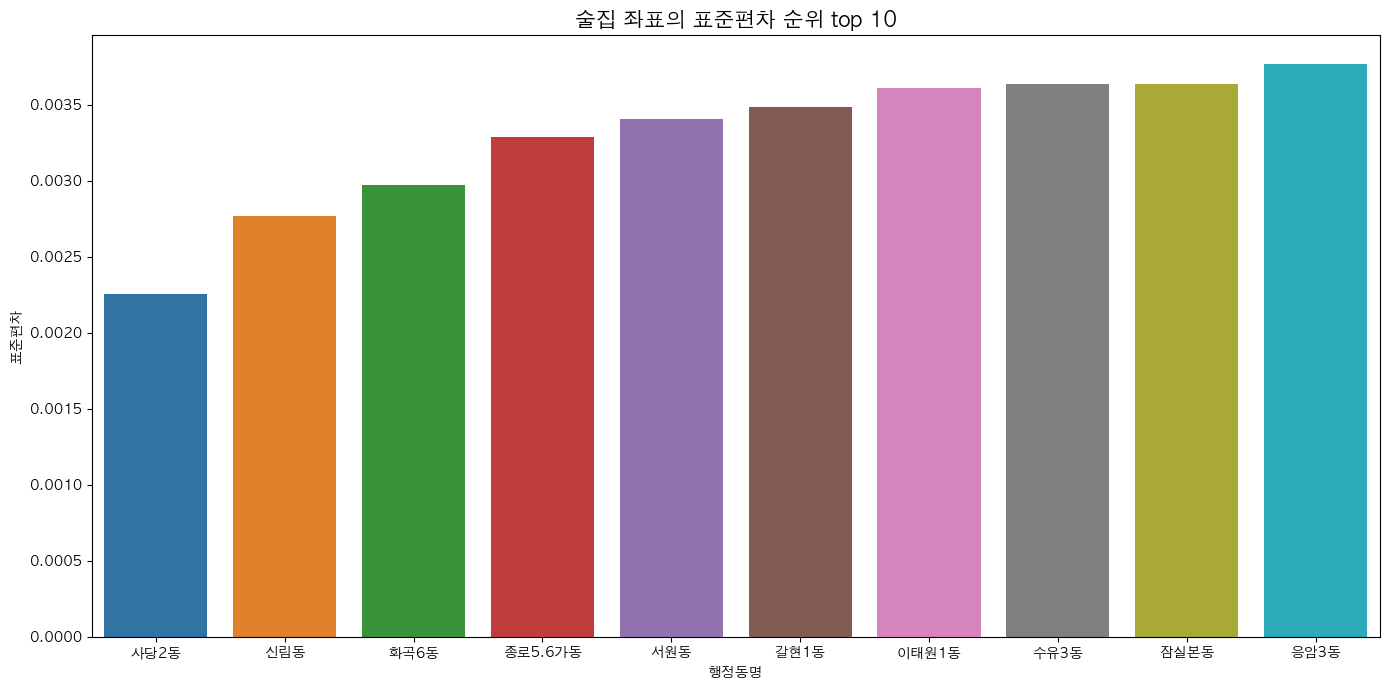

In [59]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.barplot(data=tmp.reset_index().iloc[:10,:],
            x='행정동명',
            y='sum')
# plt.yticks('')
plt.ylabel('표준편차')
plt.title('술집 좌표의 표준편차 순위 top 10', fontsize=15)
plt.tight_layout()
# plt.savefig('pub_std.png')
plt.show()